In [1]:
#Dependencies
import pandas as pd
import json
import requests
from pprint import pprint
import csv
import folium

In [2]:
#Data

In [3]:
# reading csv file into a pandas data frame
crime_data_2013 = pd.read_csv("Resources/Crimes_-_2013.csv")
crime_data_2014 = pd.read_csv("Resources/Crimes_-_2014.csv")
crime_data_2015 = pd.read_csv("Resources/Crimes_-_2015.csv")
crime_data_2016 = pd.read_csv("Resources/Crimes_-_2016.csv")
crime_data_2017 = pd.read_csv("Resources/Crimes_-_2017.csv")
crime_data_2018 = pd.read_csv("Resources/Crimes_-_2018.csv")
stat_data = pd.read_csv("Chi_stat_data.csv")

In [4]:
#Combine Crime Data
crime_data = [crime_data_2013,crime_data_2014,crime_data_2015,crime_data_2016,crime_data_2017]
crime_data = pd.concat(crime_data,axis = 0)
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11227517,JB138481,02/10/2013 12:00:00 AM,071XX S LAFAYETTE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,6.0,69.0,02,NaN,NaN,2013,02/11/2018 03:57:41 PM,NaN,NaN,NaN
1,11042141,JA376559,05/16/2013 12:00:00 AM,003XX W 64TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,HOSPITAL BUILDING/GROUNDS,False,False,...,20.0,68.0,11,NaN,NaN,2013,08/05/2017 03:50:08 PM,NaN,NaN,NaN
2,11042759,JA376850,07/08/2013 04:10:00 PM,056XX N KENMORE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,48.0,77.0,11,NaN,NaN,2013,08/05/2017 03:50:08 PM,NaN,NaN,NaN
3,11042911,JA376915,01/01/2013 12:00:00 PM,034XX N WESTERN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,...,47.0,5.0,11,NaN,NaN,2013,08/05/2017 03:50:08 PM,NaN,NaN,NaN
4,9087757,HW232654,04/14/2013 02:23:00 AM,032XX N SHEFFIELD AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,False,...,44.0,6.0,02,1169041.0,1921593.0,2013,02/12/2018 03:46:59 PM,41.940371,-87.654122,"(41.940370659, -87.654122097)"


In [5]:
#Education Data
stat_data_clean = stat_data.rename(columns={"Community Area Number":"Community Area"})
#Show Columns
stat_data_clean.head()

,Community Area,Community Area Name,Population,Non Family Households,No Highschool Education,Never Married,Median Income,Population1
0,1,Rogers Park,52000,59%,13%,55%,"39,468",52000
1,2,West Ridge,19267,19%,4%,25%,"103,473",19267
2,3,Uptown,67634,68%,9%,57%,"44,819",67634
3,4,Lincoln Square,80080,43%,17%,47%,"52,139",80080
4,5,North Center,139945,56%,9%,50%,"62,234",139945


In [6]:
# narrowing the table to relevant fields, still have to decide which one to use to be the geographical reference
crime_geo_data = crime_data[["Date", "Block", "Primary Type", "District", "Ward", "Community Area", "Latitude", "Longitude", "Year"]]
crime_geo_data.head()

,Date,Block,Primary Type,District,Ward,Community Area,Latitude,Longitude,Year
0,02/10/2013 12:00:00 AM,071XX S LAFAYETTE AVE,CRIM SEXUAL ASSAULT,7.0,6.0,69.0,NaN,NaN,2013
1,05/16/2013 12:00:00 AM,003XX W 64TH ST,DECEPTIVE PRACTICE,7.0,20.0,68.0,NaN,NaN,2013
2,07/08/2013 04:10:00 PM,056XX N KENMORE AVE,DECEPTIVE PRACTICE,20.0,48.0,77.0,NaN,NaN,2013
3,01/01/2013 12:00:00 PM,034XX N WESTERN AVE,DECEPTIVE PRACTICE,19.0,47.0,5.0,NaN,NaN,2013
4,04/14/2013 02:23:00 AM,032XX N SHEFFIELD AVE,CRIM SEXUAL ASSAULT,19.0,44.0,6.0,41.940371,-87.654122,2013


In [7]:
#Check to make sure all data is there
crime_geo_data.groupby("Year").count()

,Date,Block,Primary Type,District,Ward,Community Area,Latitude,Longitude
Year,,,,,,,,
2013,306934,306934,306934,306934,306931,306930,306342,306342
2014,275024,275024,275024,275024,275022,275024,273714,273714
2015,263727,263727,263727,263727,263725,263727,257890,257890
2016,268574,268574,268574,268574,268574,268574,267229,267229
2017,267179,267179,267179,267178,267178,267179,265041,265041


In [8]:
#Groupy by type of crime
crime_type = crime_data.groupby(["Primary Type"]).count()
crime_type

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Primary Type,,,,,,,,,,,,,,,,,,,,,
ARSON,2173,2173,2173,2173,2173,2173,2173,2173,2173,2173,...,2173,2173,2173,2171,2171,2173,2173,2171,2171,2171
ASSAULT,89940,89940,89940,89940,89940,89940,89940,89940,89940,89940,...,89939,89940,89940,89822,89822,89940,89940,89822,89822,89822
BATTERY,251856,251856,251856,251856,251856,251856,251855,251856,251856,251856,...,251856,251856,251856,251621,251621,251856,251856,251621,251621,251621
BURGLARY,72927,72927,72927,72927,72927,72927,72925,72927,72927,72927,...,72927,72927,72927,72786,72786,72927,72927,72786,72786,72786
CONCEALED CARRY LICENSE VIOLATION,154,154,154,154,154,154,154,154,154,154,...,154,154,154,153,153,154,154,153,153,153
CRIM SEXUAL ASSAULT,7120,7120,7120,7120,7120,7120,7120,7120,7120,7120,...,7120,7120,7120,6820,6820,7120,7120,6820,6820,6820
CRIMINAL DAMAGE,147374,147374,147374,147374,147374,147374,147374,147374,147374,147374,...,147371,147374,147374,147104,147104,147374,147374,147104,147104,147104
CRIMINAL TRESPASS,35197,35197,35197,35197,35197,35197,35197,35197,35197,35197,...,35196,35197,35197,35158,35158,35197,35197,35158,35158,35158
DECEPTIVE PRACTICE,82127,82127,82127,82127,82127,82127,79730,82127,82127,82127,...,82127,82127,82127,78150,78150,82127,82127,78150,78150,78150


In [9]:
#Merge Crime Data & Stat Data
#Combine Data
frames = [crime_data, stat_data_clean]
cs_df = crime_data.merge(stat_data_clean, on='Community Area', how='left')
cs_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Community Area Name,Population,Non Family Households,No Highschool Education,Never Married,Median Income,Population1
0,11227517,JB138481,02/10/2013 12:00:00 AM,071XX S LAFAYETTE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,...,NaN,NaN,NaN,Greater Grand Crossing,113708.0,45%,5%,53%,"31,701",113708.0
1,11042141,JA376559,05/16/2013 12:00:00 AM,003XX W 64TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,HOSPITAL BUILDING/GROUNDS,False,False,...,NaN,NaN,NaN,Englewood,36568.0,36%,7%,64%,"20,133",36568.0
2,11042759,JA376850,07/08/2013 04:10:00 PM,056XX N KENMORE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,NaN,Edgewater,42614.0,65%,5%,56%,"40,363",42614.0
3,11042911,JA376915,01/01/2013 12:00:00 PM,034XX N WESTERN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,BANK,False,False,...,NaN,NaN,NaN,North Center,139945.0,56%,9%,50%,"62,234",139945.0
4,9087757,HW232654,04/14/2013 02:23:00 AM,032XX N SHEFFIELD AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,True,False,...,41.940371,-87.654122,"(41.940370659, -87.654122097)",Lake View,117565.0,74%,3%,60%,"70,332",117565.0
5,11043823,JA378025,08/11/2013 05:00:00 PM,004XX N CLARK ST,0820,THEFT,$500 AND UNDER,RESTAURANT,False,False,...,NaN,NaN,NaN,Near North Side,80870.0,73%,1%,49%,"82,857",80870.0
6,11029462,JA361647,07/01/2013 12:00:00 PM,060XX N ALBANY AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,NaN,NaN,NaN,West Ridge,19267.0,19%,4%,25%,"103,473",19267.0
7,11029532,JA361567,12/01/2013 09:00:00 PM,021XX N MULLIGAN AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,True,...,NaN,NaN,NaN,Belmont Cragin,163584.0,26%,22%,43%,"50,210",163584.0
8,11044965,JA379380,06/28/2013 12:00:00 PM,020XX N MILWAUKEE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,NaN,NaN,NaN,Logan Square,85319.0,50%,15%,54%,"48,653",85319.0
9,11228666,JB149148,01/01/2013 12:01:00 AM,060XX W BYRON ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,VEHICLE NON-COMMERCIAL,False,False,...,NaN,NaN,NaN,Dunning,72272.0,29%,16%,39%,"59,004",72272.0


In [10]:
#Analysis

In [11]:
import matplotlib.pyplot as plt

#make graph of crimes per year
cs_df.Date = pd.to_datetime(cs_df.Date, format = '%m/%d/%Y %I:%M:%S %p')
cs_df.index = pd.DatetimeIndex(cs_df.Date)
plt.figure(figsize = (8,5))
cs_df.groupby([cs_df.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.savefig('Crime_years.png')
plt.show()

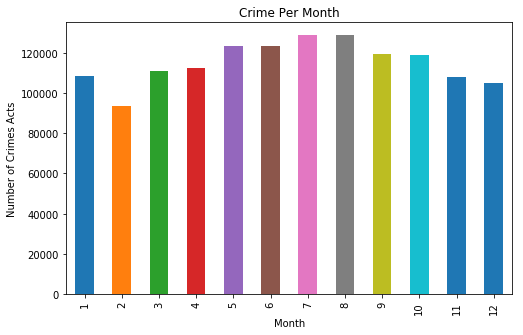

In [12]:
#make graph of crimes per month
plt.figure(figsize = (8,5))
cs_df.groupby([cs_df.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.savefig('Crime_month.png')
plt.show()

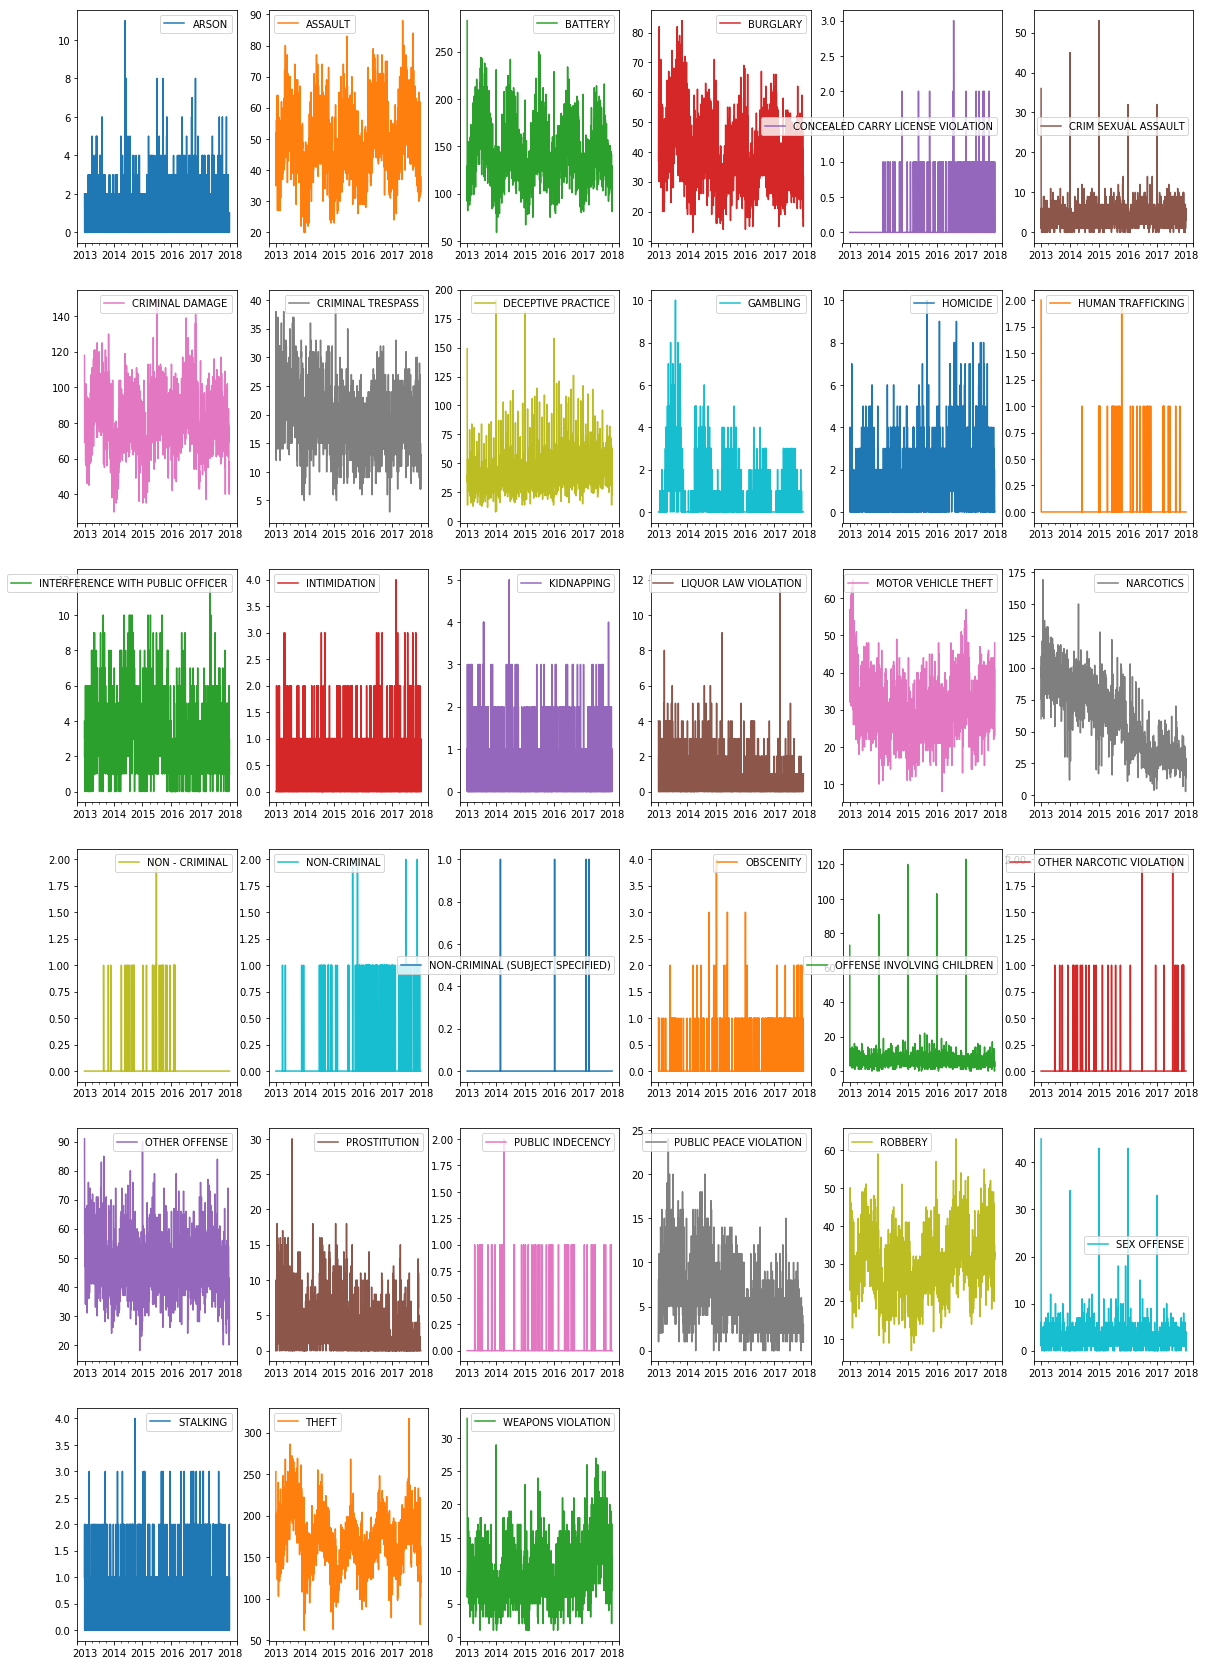

In [13]:

import numpy as np
crime_data_date = cs_df.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = cs_df.index.date, fill_value = 0)
crime_data_date.index = pd.DatetimeIndex(crime_data_date.index)
#make graph of different types of crimes per month
Plot = crime_data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.savefig('Crime_type.png')
plt.show()

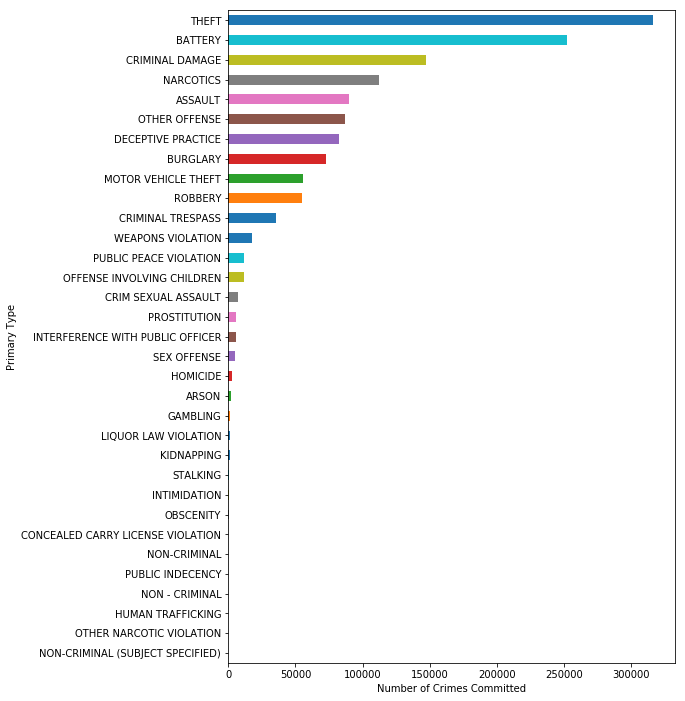

In [14]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
cs_df.groupby(cs_df['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.savefig('Primary_type.png')
plt.show()

In [15]:
# get crime types
crime_types = cs_df[['Primary Type']]

# get crime counts by primary type
crime_type_total = crime_types.groupby('Primary Type').size()#.compute()

# get arrests and domestic counts for each primary crime type
crime_type_counts = cs_df[['Primary Type', 'Arrest', 'Domestic']]\
.groupby('Primary Type').sum()#.compute()

# add crime type totals column
crime_type_counts['Total'] = crime_type_total

# print all crime stats (arrests, domestic, and totals)
print(crime_type_counts.sort_values(by='Total', ascending=False))

                                     Arrest  Domestic   Total
Primary Type                                                 
THEFT                               34791.0   10524.0  316249
BATTERY                             57343.0  123122.0  251856
CRIMINAL DAMAGE                      9437.0   15744.0  147374
NARCOTICS                          111436.0      52.0  111889
ASSAULT                             19963.0   22739.0   89940
OTHER OFFENSE                       19483.0   26990.0   86940
DECEPTIVE PRACTICE                   6871.0     794.0   82127
BURGLARY                             3961.0     652.0   72927
MOTOR VEHICLE THEFT                  4585.0     516.0   55275
ROBBERY                              5168.0     881.0   55094
CRIMINAL TRESPASS                   23698.0    1500.0   35197
WEAPONS VIOLATION                   14097.0      59.0   17854
PUBLIC PEACE VIOLATION               8695.0     362.0   11564
OFFENSE INVOLVING CHILDREN           1819.0    5887.0   11537
CRIM SEX

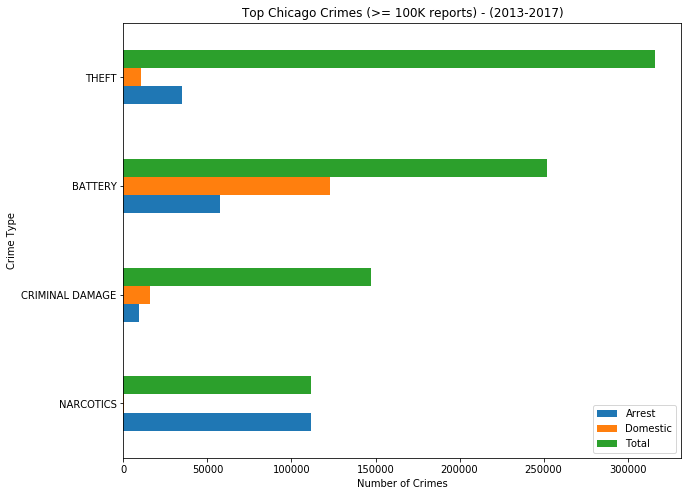

In [16]:
# plot top crimes (>-= 100,000 reports)
crime_type_counts[crime_type_counts['Total'] >= 100000].sort_values(by='Total', ascending=True)\
.plot(kind='barh', figsize=(10,8))
plt.title('Top Chicago Crimes (>= 100K reports) - (2013-2017)')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
ax = plt.gca()
plt.savefig('top_Crime_type.png')
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

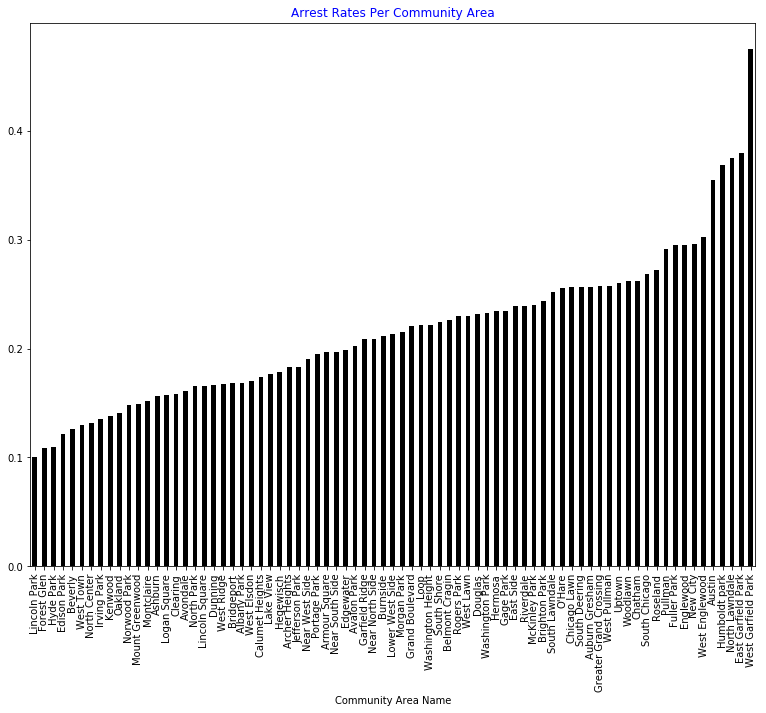

In [17]:
#Arrest rates per community area
Crime_Data_ca = cs_df.pivot_table('Arrest', aggfunc = np.sum, columns = ['Community Area Name'], 
                                         index = cs_df.index.date, fill_value = 0)

crime_CA = Crime_Data_ca.sum() / cs_df.groupby(cs_df['Community Area Name']).size()

plt.figure(figsize=(13,10))
crime_CA.sort_values().plot(kind = 'bar', color = 'k')
plt.title('Arrest Rates Per Community Area', color = 'b')
plt.savefig('Crime_Arrest_rate.png')
plt.show()

In [20]:
# get crime location counts
crime_locations = cs_df.groupby('Location Description').size()#.compute()
crime_locations = crime_locations.sort_values(ascending=False).rename('Total') #.reset_index()

# print crime location stats
print(crime_locations.head())
print("...\nTotal Locations: {:,}".format(crime_locations.size))

Location Description
STREET       311637
RESIDENCE    225277
APARTMENT    176015
SIDEWALK     140536
OTHER         55261
Name: Total, dtype: int64
...
Total Locations: 147


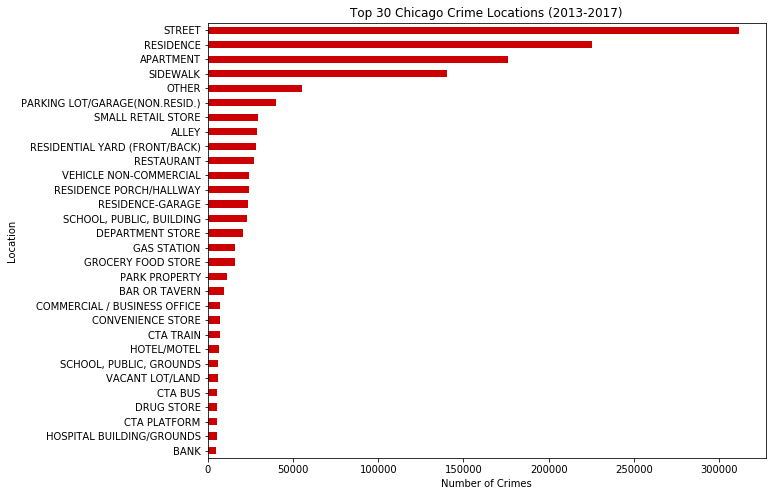

In [21]:
# plot top 30 crime locations
crime_locations[:30].sort_values(ascending=True)\
.plot(kind='barh', figsize=(10,8), color='#cc0000')
plt.title('Top 30 Chicago Crime Locations (2013-2017)')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
ax = plt.gca()
plt.savefig('Crime_location.png')
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()